In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
# Quick peek at the raw data
df = pd.read_csv("17100009.csv")
df.head(10)

In [ ]:
# Load the dataset, parse dates, and keep only the relevant columns
df = pd.read_csv("17100009.csv")
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])
df = df[['REF_DATE', 'GEO', 'VALUE']]

# Filter to Alberta, 2012–2025
# .copy() decouples alberta_df from df so adding new columns is safe (no SettingWithCopyWarning)
alberta_df = df[
    (df['GEO'] == 'Alberta') &
    (df['REF_DATE'] >= '2012-01-01') &
    (df['REF_DATE'] <= '2025-01-01')
].copy()

alberta_df['Population_Change'] = alberta_df['VALUE'].diff()

pd.set_option('display.max_rows', None)
display(alberta_df)

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

chart = sns.lineplot(data=alberta_df, x='REF_DATE', y='VALUE', linewidth=2.5, color='#0072B2')

plt.title('Alberta Population Growth', fontsize=16, weight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)

# Format y-axis as human-readable numbers (e.g. 4M instead of 4000000)
chart.yaxis.set_major_formatter(ticker.EngFormatter())

plt.tight_layout()
plt.show()

In [ ]:
# Convert REF_DATE to plain date objects for cleaner x-axis labels (removes the 00:00:00 time component)
alberta_df['REF_DATE'] = pd.to_datetime(alberta_df['REF_DATE']).dt.date

plt.figure(figsize=(14, 7))

# Red for 2020+ (post-COVID surge), blue for earlier periods
colors = ['#D62728' if date.year >= 2020 else '#4C72B0' for date in alberta_df['REF_DATE']]

ax = sns.barplot(
    data=alberta_df,
    x='REF_DATE',
    y='Population_Change',
    palette=colors
)

ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))
plt.xticks(rotation=45, ha='right')

plt.axhline(0, color='black', linewidth=0.8)

plt.title('Quarterly Population Change: The 2020+ Surge', fontsize=16, weight='normal', pad=20)
plt.ylabel('Net Population Change (Persons)', fontsize=12)
plt.xlabel('Date', fontsize=12)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

In [ ]:
# Filter for Alberta from 1946 onwards (df already loaded and datetime-parsed above)
alberta_long_df = df[
    (df['GEO'] == 'Alberta') &
    (df['REF_DATE'] >= '1946-01-01')
].copy()

alberta_long_df['Population_Change'] = alberta_long_df['VALUE'].diff()

# Convert to plain date for cleaner x-axis labels
alberta_long_df['REF_DATE'] = alberta_long_df['REF_DATE'].dt.date

plt.figure(figsize=(16, 8))

# Red for 2020+ (post-COVID surge), blue for earlier periods
colors = ['#D62728' if date.year >= 2020 else '#4C72B0' for date in alberta_long_df['REF_DATE']]

ax = sns.barplot(
    data=alberta_long_df,
    x='REF_DATE',
    y='Population_Change',
    palette=colors
)

# Limit x-axis tick labels so they don't overlap
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))
plt.xticks(rotation=45, ha='right')

plt.axhline(0, color='black', linewidth=0.8)

plt.title('Alberta Population Change (1946 - Present)', fontsize=18, weight='bold', pad=20)
plt.ylabel('Net Quarterly Change (Persons)', fontsize=12)
plt.xlabel('Year', fontsize=12)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

In [8]:
# Define the thresholds you want to check
thresholds = [10000, 20000, 30000, 40000]

print("Frequency of Quarterly Population Growth (1946 - Present):")
print("-" * 50)

for limit in thresholds:
    # Count how many rows exceed the limit
    count = (alberta_long_df['Population_Change'] > limit).sum()
    
    # Calculate percentage for context
    total_quarters = len(alberta_long_df)
    percentage = (count / total_quarters) * 100
    
    print(f"Exceeding {limit:,.0f}:  {count} times  ({percentage:.1f}% of all quarters)")

print("-" * 50)

# context: Show exactly WHEN the > 40,000 events happened
print("\nQuarters exceeding 40,000 people:")
display(alberta_long_df[alberta_long_df['Population_Change'] > 40000][['REF_DATE', 'Population_Change']])

Frequency of Quarterly Population Growth (1946 - Present):
--------------------------------------------------
Exceeding 10,000:  166 times  (55.7% of all quarters)
Exceeding 20,000:  50 times  (16.8% of all quarters)
Exceeding 30,000:  16 times  (5.4% of all quarters)
Exceeding 40,000:  9 times  (3.0% of all quarters)
--------------------------------------------------

Quarters exceeding 40,000 people:


,REF_DATE,Population_Change
1071,1971-07-01,42717.0
3862,2022-10-01,47544.0
3890,2023-04-01,44714.0
3904,2023-07-01,46961.0
3918,2023-10-01,63597.0
3932,2024-01-01,49633.0
3946,2024-04-01,55889.0
3960,2024-07-01,51335.0
3974,2024-10-01,48045.0


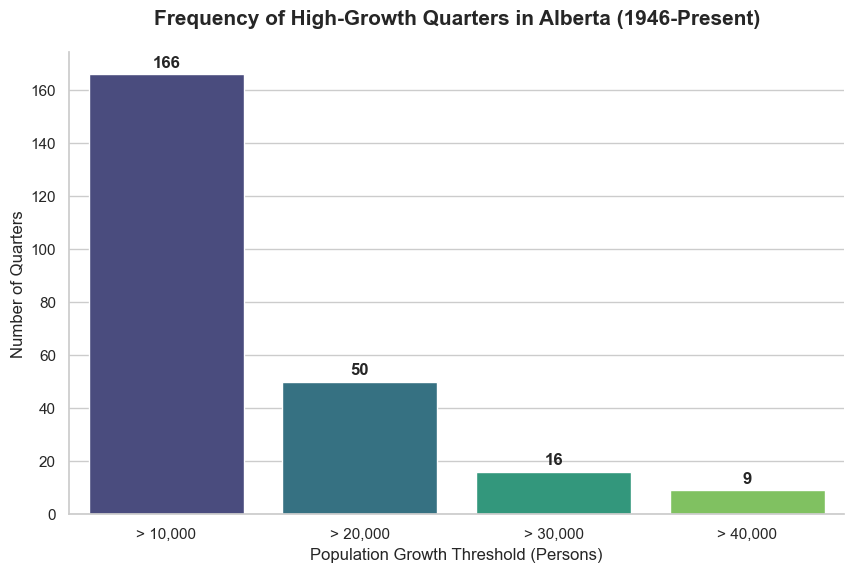

In [9]:
# 1. Prepare the data for plotting
thresholds = [10000, 20000, 30000, 40000]
counts = [(alberta_long_df['Population_Change'] > t).sum() for t in thresholds]

# Create a small DataFrame for the plot
summary_df = pd.DataFrame({
    'Threshold': [f"> {t:,.0f}" for t in thresholds],
    'Count': counts
})

# 2. Setup Plot
plt.figure(figsize=(10, 6))

# 3. Create Bar Plot
ax = sns.barplot(data=summary_df, x='Threshold', y='Count', palette="viridis")

# 4. Add the actual numbers on top of each bar
for i in ax.containers:
    ax.bar_label(i, padding=3, fontsize=12, fontweight='bold')

# 5. Titles and Polish
plt.title('Frequency of High-Growth Quarters in Alberta (1946-Present)', fontsize=15, weight='bold', pad=20)
plt.xlabel('Population Growth Threshold (Persons)', fontsize=12)
plt.ylabel('Number of Quarters', fontsize=12)

# Remove the top and right spines for a cleaner look
sns.despine()

plt.show()

In [ ]:
# ============================================================
# SETUP: Full Alberta dataset (all available years) + Canada totals
# ============================================================

# Load a fresh copy of the full dataset (needed for Canada-wide share analysis)
df_full = pd.read_csv("17100009.csv")
df_full['REF_DATE'] = pd.to_datetime(df_full['REF_DATE'])
df_full = df_full[['REF_DATE', 'GEO', 'VALUE']]

# Alberta — all available years
alberta_all = df_full[df_full['GEO'] == 'Alberta'].copy().sort_values('REF_DATE').reset_index(drop=True)

# Alberta — 2012 to 2025 (focus window)
alberta_recent = df_full[
    (df_full['GEO'] == 'Alberta') &
    (df_full['REF_DATE'] >= '2012-01-01') &
    (df_full['REF_DATE'] <= '2025-01-01')
].copy().sort_values('REF_DATE').reset_index(drop=True)

# Canada totals (needed for population share calculation)
canada_all = df_full[df_full['GEO'] == 'Canada'].copy().sort_values('REF_DATE').reset_index(drop=True)

print(f"Alberta data: {alberta_all['REF_DATE'].min().date()} to {alberta_all['REF_DATE'].max().date()} ({len(alberta_all)} records)")
print(f"Canada data:  {canada_all['REF_DATE'].min().date()} to {canada_all['REF_DATE'].max().date()} ({len(canada_all)} records)")

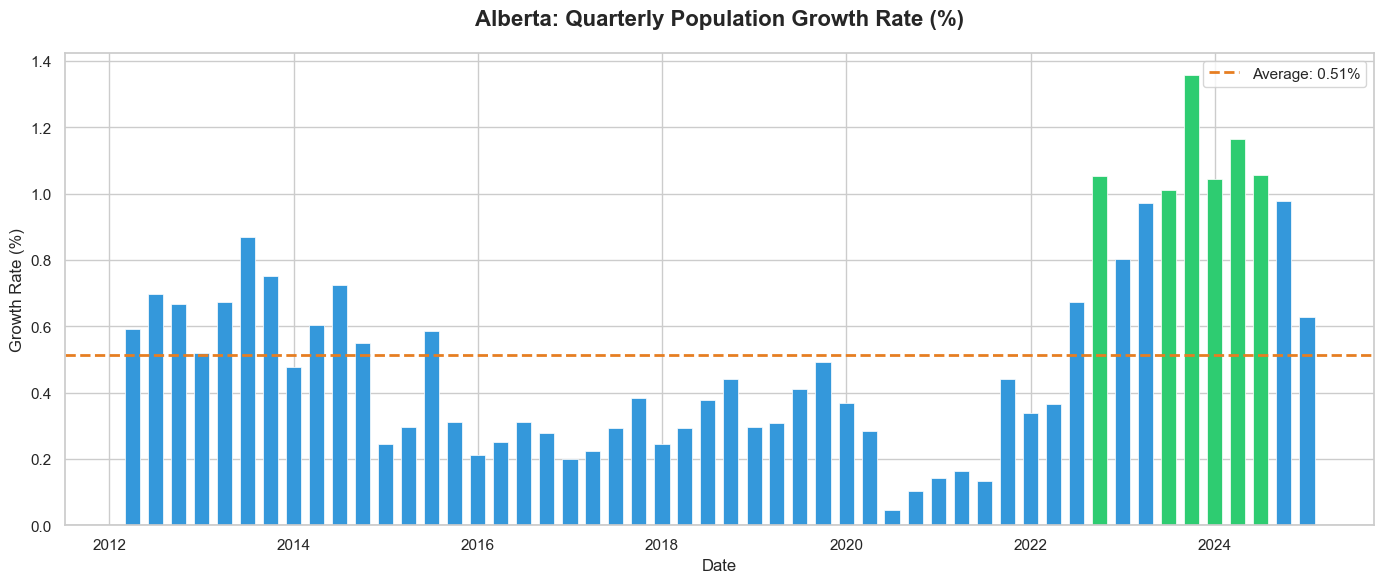


Average quarterly growth rate: 0.514%
Max quarterly growth rate:     1.356% (2023-10-01)
Min quarterly growth rate:     0.046% (2020-07-01)


In [13]:
# ============================================================
# ANALYSIS 1: Percentage Growth Rate (Quarter-over-Quarter)
# ============================================================
alberta_recent['Growth_Rate_Pct'] = alberta_recent['VALUE'].pct_change() * 100

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 6))

colors = ['#E74C3C' if x < 0 else '#2ECC71' if x >= 1.0 else '#3498DB' 
          for x in alberta_recent['Growth_Rate_Pct'].fillna(0)]

ax.bar(alberta_recent['REF_DATE'], alberta_recent['Growth_Rate_Pct'], 
       width=60, color=colors, edgecolor='white', linewidth=0.5)

ax.set_title('Alberta: Quarterly Population Growth Rate (%)', fontsize=16, weight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Growth Rate (%)', fontsize=12)
ax.axhline(y=0, color='black', linewidth=0.8)

# Add average line
avg_growth = alberta_recent['Growth_Rate_Pct'].mean()
ax.axhline(y=avg_growth, color='#E67E22', linewidth=2, linestyle='--', 
           label=f'Average: {avg_growth:.2f}%')
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

print(f"\nAverage quarterly growth rate: {avg_growth:.3f}%")
print(f"Max quarterly growth rate:     {alberta_recent['Growth_Rate_Pct'].max():.3f}% ({alberta_recent.loc[alberta_recent['Growth_Rate_Pct'].idxmax(), 'REF_DATE'].date()})")
print(f"Min quarterly growth rate:     {alberta_recent['Growth_Rate_Pct'].min():.3f}% ({alberta_recent.loc[alberta_recent['Growth_Rate_Pct'].idxmin(), 'REF_DATE'].date()})")

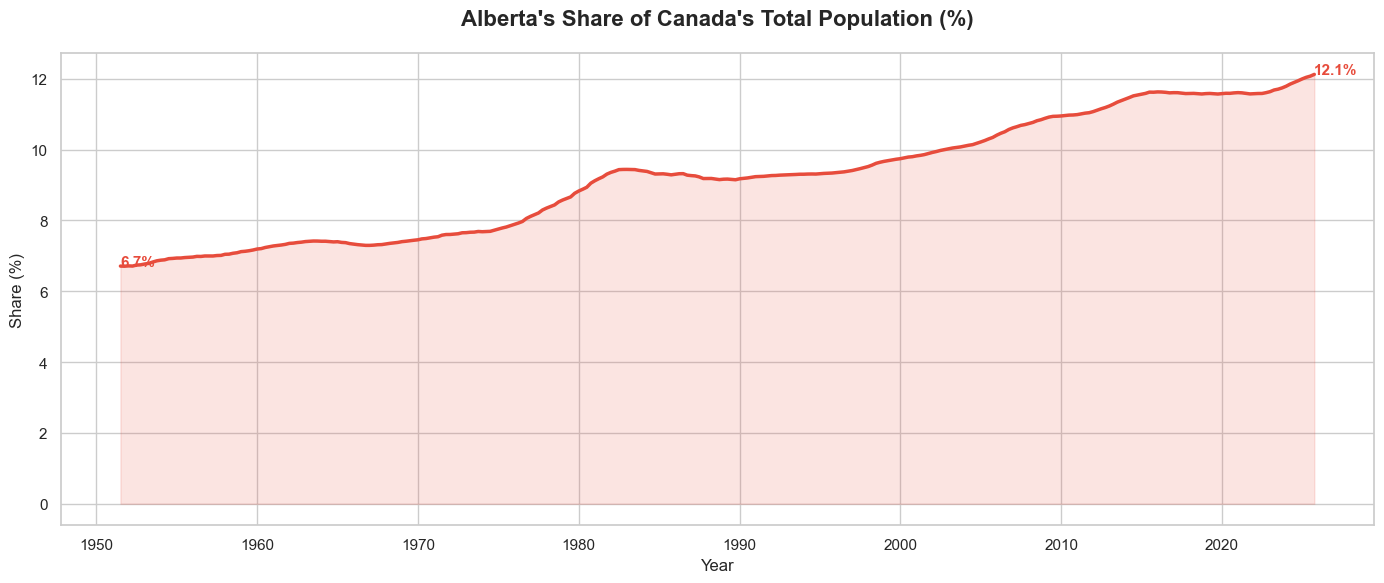


Alberta's population share:
  Earliest (1951-07-01): 6.71%
  Latest   (2025-10-01): 12.12%
  Change:  +5.41 percentage points


In [14]:
# ============================================================
# ANALYSIS 2: Alberta's Share of Canada's Total Population
# ============================================================

# Merge Alberta and Canada data on matching dates
share_df = alberta_all.merge(canada_all, on='REF_DATE', suffixes=('_AB', '_CA'))
share_df['AB_Share_Pct'] = (share_df['VALUE_AB'] / share_df['VALUE_CA']) * 100

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(share_df['REF_DATE'], share_df['AB_Share_Pct'], 
        linewidth=2.5, color='#E74C3C')
ax.fill_between(share_df['REF_DATE'], share_df['AB_Share_Pct'], 
                alpha=0.15, color='#E74C3C')

ax.set_title("Alberta's Share of Canada's Total Population (%)", fontsize=16, weight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Share (%)', fontsize=12)

# Annotate first and last values
first = share_df.iloc[0]
last = share_df.iloc[-1]
ax.annotate(f"{first['AB_Share_Pct']:.1f}%", 
            xy=(first['REF_DATE'], first['AB_Share_Pct']),
            fontsize=11, fontweight='bold', color='#E74C3C')
ax.annotate(f"{last['AB_Share_Pct']:.1f}%", 
            xy=(last['REF_DATE'], last['AB_Share_Pct']),
            fontsize=11, fontweight='bold', color='#E74C3C')

plt.tight_layout()
plt.show()

print(f"\nAlberta's population share:")
print(f"  Earliest ({first['REF_DATE'].date()}): {first['AB_Share_Pct']:.2f}%")
print(f"  Latest   ({last['REF_DATE'].date()}): {last['AB_Share_Pct']:.2f}%")
print(f"  Change:  +{last['AB_Share_Pct'] - first['AB_Share_Pct']:.2f} percentage points")

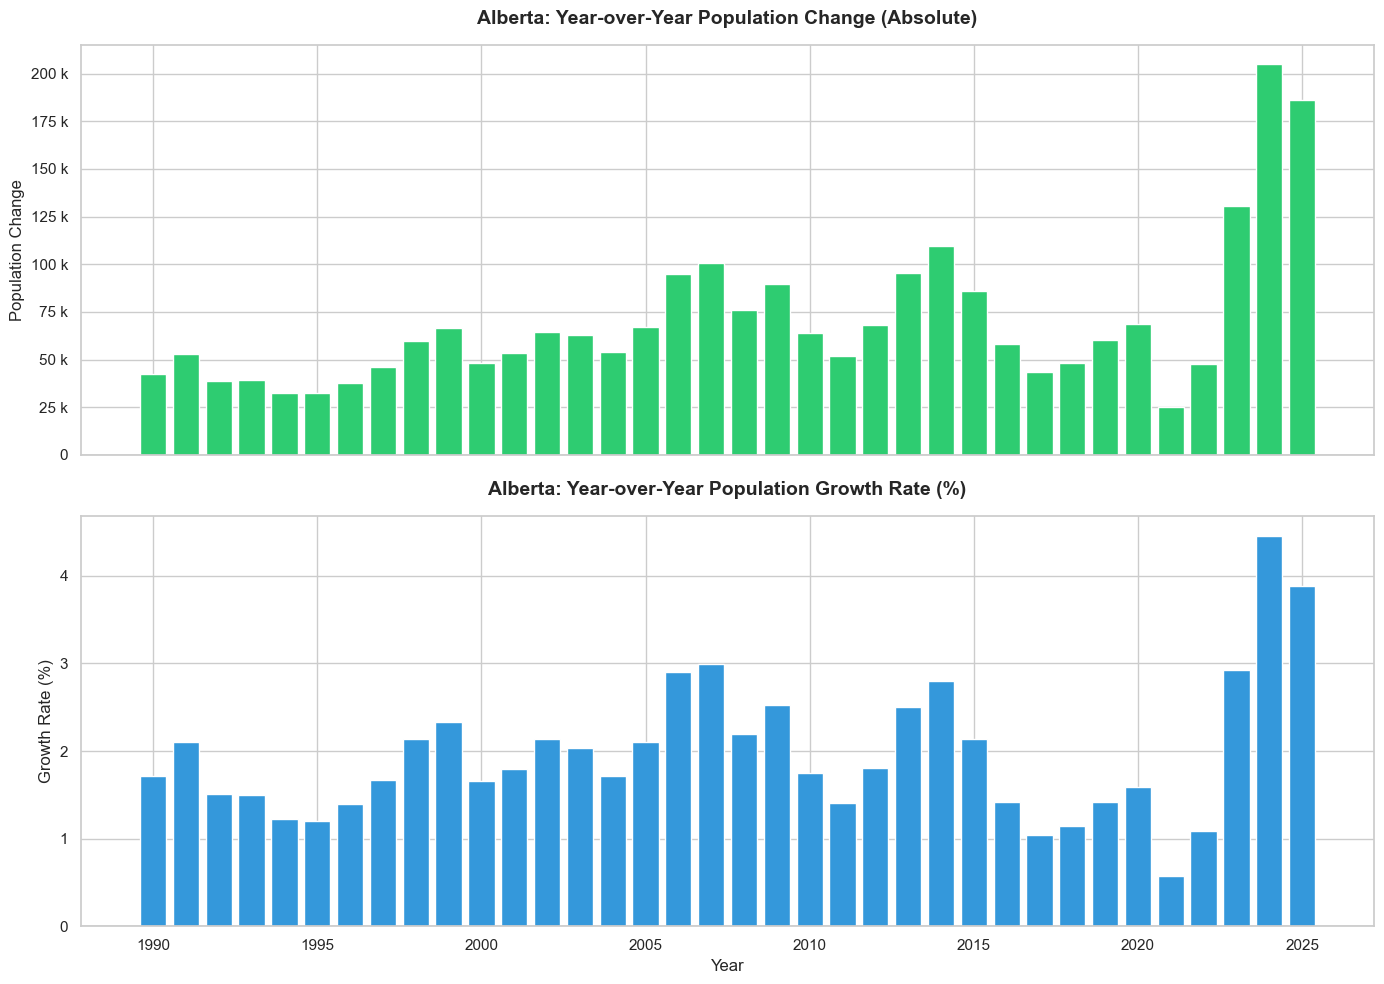

In [15]:
# ============================================================
# ANALYSIS 3: Year-over-Year (YoY) Growth Rate
# ============================================================

# Only use Q1 data (January) for clean annual comparison
alberta_q1 = alberta_all[alberta_all['REF_DATE'].dt.month == 1].copy().reset_index(drop=True)
alberta_q1['YoY_Change'] = alberta_q1['VALUE'].diff()
alberta_q1['YoY_Growth_Pct'] = alberta_q1['VALUE'].pct_change() * 100
alberta_q1['Year'] = alberta_q1['REF_DATE'].dt.year

# Focus on recent decades for readability
alberta_q1_recent = alberta_q1[alberta_q1['Year'] >= 1990].copy()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Top: Absolute YoY change
colors1 = ['#E74C3C' if x < 0 else '#2ECC71' 
           for x in alberta_q1_recent['YoY_Change'].fillna(0)]
ax1.bar(alberta_q1_recent['Year'], alberta_q1_recent['YoY_Change'], color=colors1, edgecolor='white')
ax1.set_title('Alberta: Year-over-Year Population Change (Absolute)', fontsize=14, weight='bold', pad=15)
ax1.set_ylabel('Population Change', fontsize=12)
ax1.yaxis.set_major_formatter(ticker.EngFormatter())
ax1.axhline(y=0, color='black', linewidth=0.8)

# Bottom: % YoY growth
colors2 = ['#E74C3C' if x < 0 else '#3498DB' 
           for x in alberta_q1_recent['YoY_Growth_Pct'].fillna(0)]
ax2.bar(alberta_q1_recent['Year'], alberta_q1_recent['YoY_Growth_Pct'], color=colors2, edgecolor='white')
ax2.set_title('Alberta: Year-over-Year Population Growth Rate (%)', fontsize=14, weight='bold', pad=15)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Growth Rate (%)', fontsize=12)
ax2.axhline(y=0, color='black', linewidth=0.8)

plt.tight_layout()
plt.show()

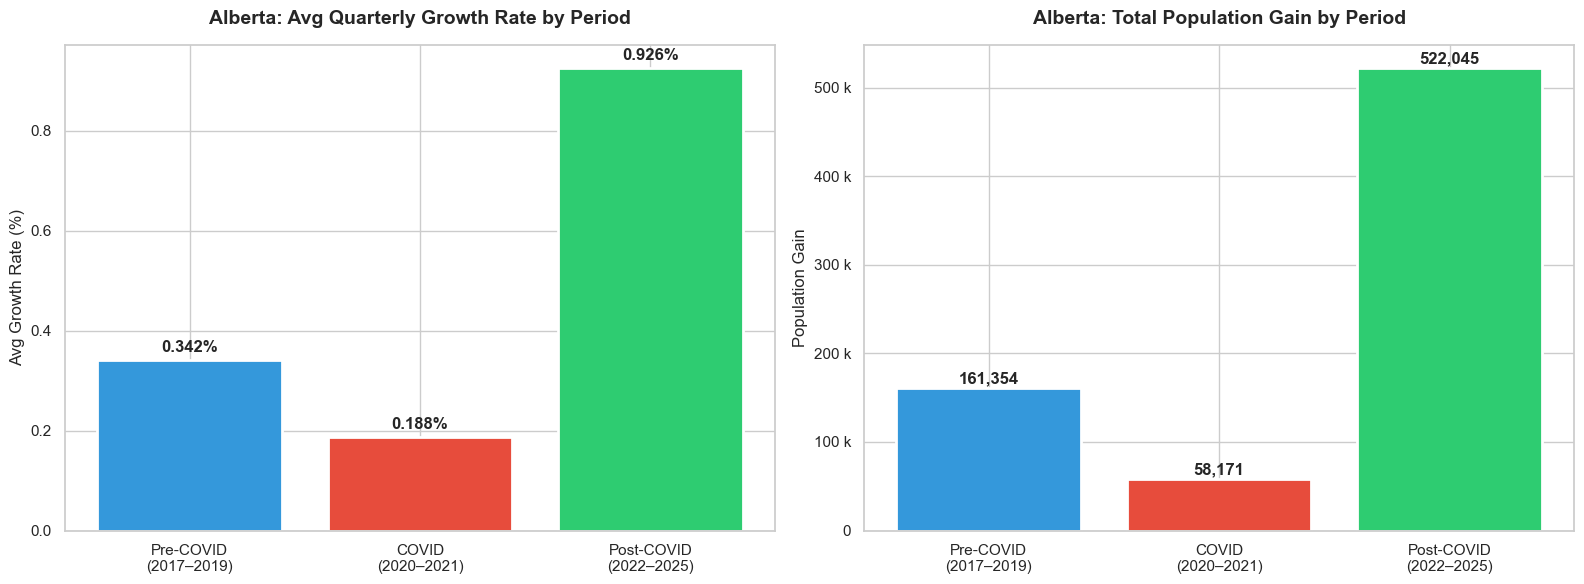

In [16]:
# ============================================================
# ANALYSIS 4: COVID-19 Impact on Alberta's Population Growth
# ============================================================

# Define periods
pre_covid = alberta_recent[(alberta_recent['REF_DATE'] >= '2017-01-01') & 
                           (alberta_recent['REF_DATE'] < '2020-01-01')].copy()
covid = alberta_recent[(alberta_recent['REF_DATE'] >= '2020-01-01') & 
                       (alberta_recent['REF_DATE'] < '2022-01-01')].copy()
post_covid = alberta_recent[(alberta_recent['REF_DATE'] >= '2022-01-01')].copy()

# Compute growth rates for each period
pre_covid['Growth_Pct'] = pre_covid['VALUE'].pct_change() * 100
covid['Growth_Pct'] = covid['VALUE'].pct_change() * 100
post_covid['Growth_Pct'] = post_covid['VALUE'].pct_change() * 100

avg_pre = pre_covid['Growth_Pct'].mean()
avg_covid = covid['Growth_Pct'].mean()
avg_post = post_covid['Growth_Pct'].mean()

# Bar chart comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left: Average quarterly growth rate by period
periods = ['Pre-COVID\n(2017–2019)', 'COVID\n(2020–2021)', 'Post-COVID\n(2022–2025)']
avgs = [avg_pre, avg_covid, avg_post]
period_colors = ['#3498DB', '#E74C3C', '#2ECC71']

bars = ax1.bar(periods, avgs, color=period_colors, edgecolor='white', linewidth=2)
for bar, val in zip(bars, avgs):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{val:.3f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax1.set_title('Alberta: Avg Quarterly Growth Rate by Period', fontsize=14, weight='bold', pad=15)
ax1.set_ylabel('Avg Growth Rate (%)', fontsize=12)

# Right: Total population gain in each period
pop_gain_pre = pre_covid['VALUE'].iloc[-1] - pre_covid['VALUE'].iloc[0]
pop_gain_covid = covid['VALUE'].iloc[-1] - covid['VALUE'].iloc[0]
pop_gain_post = post_covid['VALUE'].iloc[-1] - post_covid['VALUE'].iloc[0]

gains = [pop_gain_pre, pop_gain_covid, pop_gain_post]
bars2 = ax2.bar(periods, gains, color=period_colors, edgecolor='white', linewidth=2)
for bar, val in zip(bars2, gains):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2000, 
             f'{val:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax2.set_title('Alberta: Total Population Gain by Period', fontsize=14, weight='bold', pad=15)
ax2.set_ylabel('Population Gain', fontsize=12)
ax2.yaxis.set_major_formatter(ticker.EngFormatter())

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================
# ANALYSIS 5: Descriptive Statistics Summary — Alberta
# ============================================================

alberta_stats = alberta_recent.copy()
alberta_stats['QoQ_Change'] = alberta_stats['VALUE'].diff()
alberta_stats['QoQ_Growth_Pct'] = alberta_stats['VALUE'].pct_change() * 100

stats = {
    'Period': f"{alberta_stats['REF_DATE'].min().date()} to {alberta_stats['REF_DATE'].max().date()}",
    'Starting Population': f"{alberta_stats['VALUE'].iloc[0]:,.0f}",
    'Ending Population': f"{alberta_stats['VALUE'].iloc[-1]:,.0f}",
    'Total Growth': f"{alberta_stats['VALUE'].iloc[-1] - alberta_stats['VALUE'].iloc[0]:,.0f}",
    'Total Growth (%)': f"{((alberta_stats['VALUE'].iloc[-1] / alberta_stats['VALUE'].iloc[0]) - 1) * 100:.2f}%",
    'Avg Quarterly Growth': f"{alberta_stats['QoQ_Change'].mean():,.0f}",
    'Avg Quarterly Growth (%)': f"{alberta_stats['QoQ_Growth_Pct'].mean():.3f}%",
    'Max Quarterly Growth': f"{alberta_stats['QoQ_Change'].max():,.0f} ({alberta_stats.loc[alberta_stats['QoQ_Change'].idxmax(), 'REF_DATE'].date()})",
    'Min Quarterly Growth': f"{alberta_stats['QoQ_Change'].min():,.0f} ({alberta_stats.loc[alberta_stats['QoQ_Change'].idxmin(), 'REF_DATE'].date()})",
    'Std Dev (Quarterly Growth)': f"{alberta_stats['QoQ_Change'].std():,.0f}",
    'Number of Quarters': f"{len(alberta_stats)}",
}

stats_df = pd.DataFrame(list(stats.items()), columns=['Metric', 'Value'])
display(stats_df.style.hide(axis='index').set_properties(**{'text-align': 'left'}))